In [501]:
%run db_connection.ipynb

mongo = db_connection()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 10]


In [502]:
transactions = pd.DataFrame(mongo.get_transactions())
transactions
actors_transactions =pd.DataFrame( transactions["closed_transactions"][0])
actors_transactions

,_id,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,theoretical_lead,transaction_id,delivered,update_day
0,1,10,1000001,1,1,0,1,1001,10090,None,9,9,1,1,10
1,3,10,3000001,3,3,2,3,3001,10368,None,7,7,3,1,10
2,6,10,5000002,6,6,4,5,5001,10229,None,4,4,6,1,10
3,5,13,5000001,5,5,4,5,5001,10284,None,8,8,5,1,13
4,2,15,2000001,2,2,1,2,2001,10305,None,13,13,2,1,15
5,8,15,5000004,8,8,4,5,5001,10308,None,7,7,8,1,15
6,4,16,4000001,4,4,3,4,4001,10388,None,12,12,4,1,16
7,12,16,5000007,11,11,4,5,5001,309553,None,5,5,12,1,16
8,10,17,2000009,10,10,1,2,2001,10225,None,7,7,10,1,17
9,7,19,5000003,7,7,4,5,5001,10256,None,12,12,7,1,19


In [503]:
new=actors_transactions[["lead_time","receiver" ]]

new.groupby("receiver").describe()

lead_time                                                    
             count       mean       std   min   25%   50%    75%   max
receiver                                                              
0              3.0  10.333333  1.154701   9.0  10.0  11.0  11.00  11.0
1              2.0  10.000000  4.242641   7.0   8.5  10.0  11.50  13.0
2              1.0   7.000000       NaN   7.0   7.0   7.0   7.00   7.0
3              1.0  12.000000       NaN  12.0  12.0  12.0  12.00  12.0
4              8.0   9.125000  3.907411   4.0   6.5   8.5  12.25  15.0

In [504]:
df0=actors_transactions.loc[actors_transactions['receiver'] == 0]
df1=actors_transactions.loc[actors_transactions['receiver'] == 1]
df2=actors_transactions.loc[actors_transactions['receiver'] == 2]
df3=actors_transactions.loc[actors_transactions['receiver'] == 3]
df4=actors_transactions.loc[actors_transactions['receiver'] == 4]


In [505]:
print( "0->",format( df0["lead_time"].mean(), ".2f"), format(  df0["lead_time"].std(), ".2f"))
print( "1->",format( df1["lead_time"].mean(), ".2f"), format(  df1["lead_time"].std(), ".2f"))
print( "2->",format( df2["lead_time"].mean(), ".2f"), format(  df2["lead_time"].std(), ".2f"))
print( "3->",format( df3["lead_time"].mean(), ".2f"), format(  df3["lead_time"].std(), ".2f"))
print( "4->",format( df4["lead_time"].mean(), ".2f"), format(  df4["lead_time"].std(), ".2f"))


0-> 10.33 1.15
1-> 10.00 4.24
2-> 7.00 nan
3-> 12.00 nan
4-> 9.12 3.91


In [506]:
print("\tTransaction")
print(df0["lead_time"].describe(),"\n\n",
      df1["lead_time"].describe(),"\n\n",
      df2["lead_time"].describe(),"\n\n",
      df3["lead_time"].describe(),"\n\n",
      df4["lead_time"].describe(),"\n\n",
     )

	Transaction
count     3.000000
mean     10.333333
std       1.154701
min       9.000000
25%      10.000000
50%      11.000000
75%      11.000000
max      11.000000
Name: lead_time, dtype: float64 

 count     2.000000
mean     10.000000
std       4.242641
min       7.000000
25%       8.500000
50%      10.000000
75%      11.500000
max      13.000000
Name: lead_time, dtype: float64 

 count    1.0
mean     7.0
std      NaN
min      7.0
25%      7.0
50%      7.0
75%      7.0
max      7.0
Name: lead_time, dtype: float64 

 count     1.0
mean     12.0
std       NaN
min      12.0
25%      12.0
50%      12.0
75%      12.0
max      12.0
Name: lead_time, dtype: float64 

 count     8.000000
mean      9.125000
std       3.907411
min       4.000000
25%       6.500000
50%       8.500000
75%      12.250000
max      15.000000
Name: lead_time, dtype: float64 




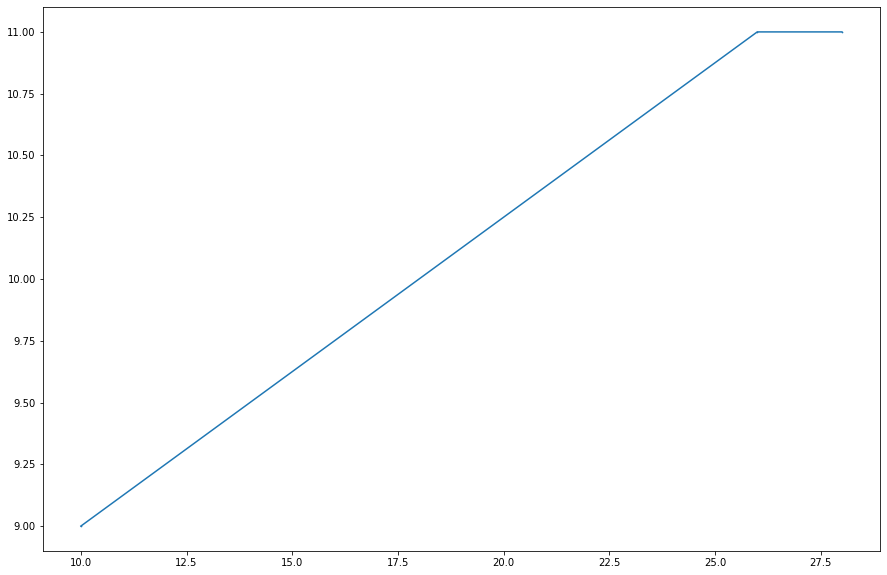

In [507]:
plt.plot( "deliver_day", "lead_time", "", data=df0, marker='o', markersize=0.7)


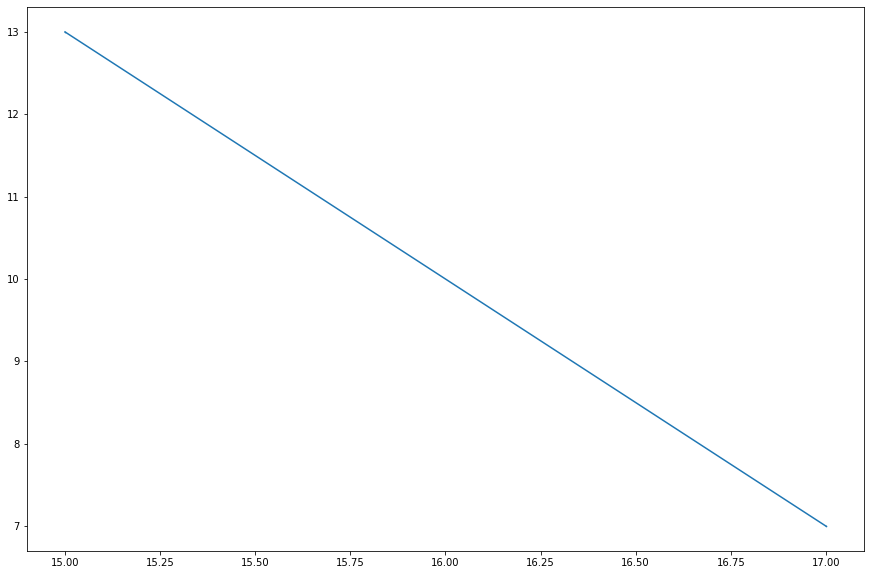

In [508]:
plt.plot( "deliver_day", "lead_time", "", data=df1, marker='o', markersize=0.7)


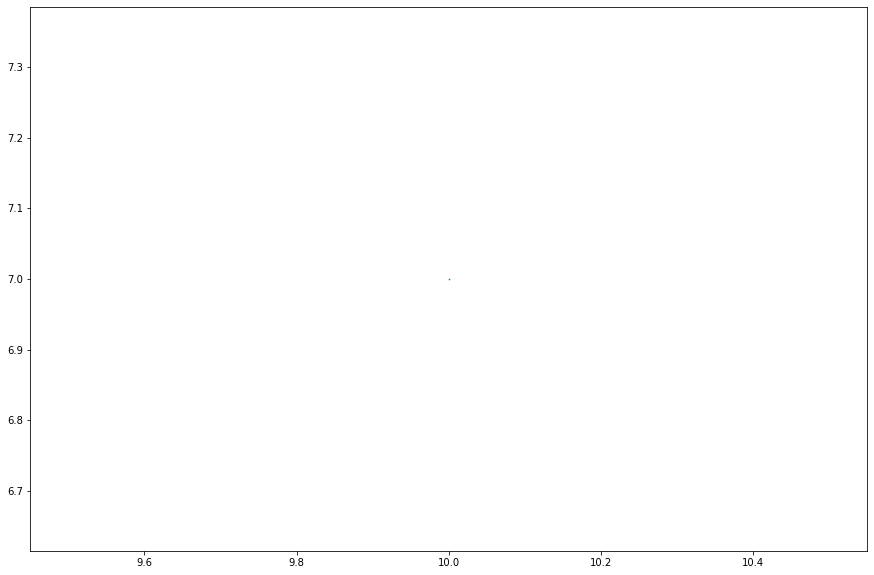

In [509]:
plt.plot( "deliver_day", "lead_time", "", data=df2, marker='o', markersize=0.7)


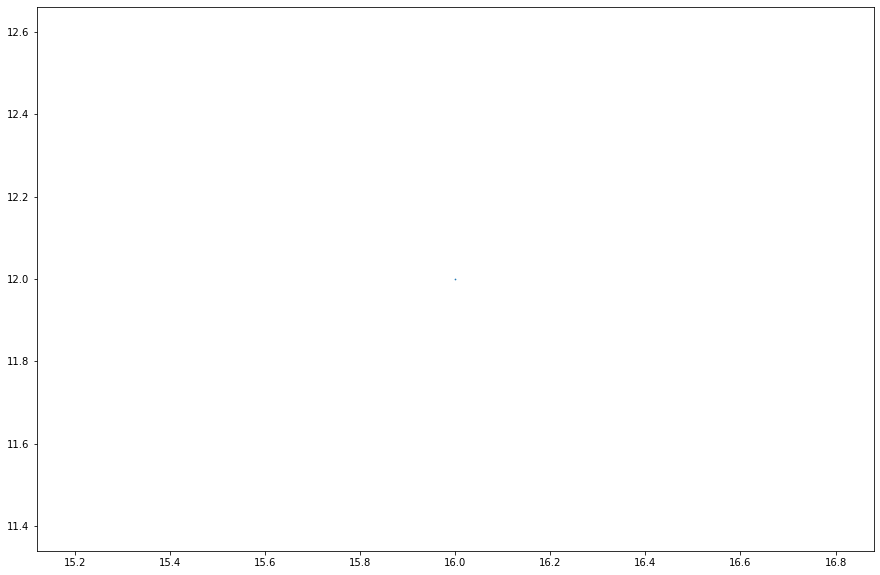

In [510]:
plt.plot( "deliver_day", "lead_time", "", data=df3, marker='o', markersize=0.7)

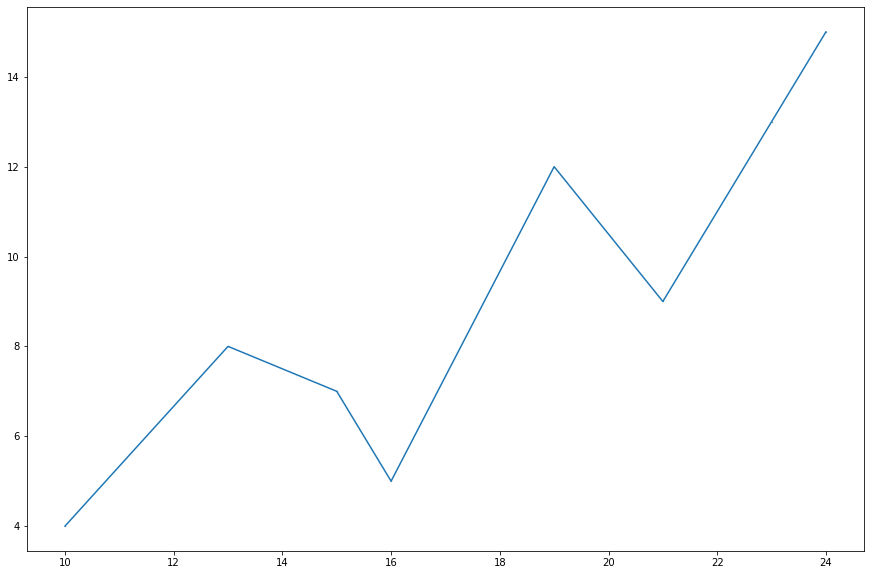

In [511]:
plt.plot( "deliver_day", "lead_time", "", data=df4, marker='.', markersize=0.7)